In [1]:
import tensorflow as tf

In [2]:
import os
import urllib
import cv2
import numpy as np

In [3]:
from pixellib.semantic import semantic_segmentation

In [4]:
from matplotlib import pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#이미지 읽어오기
img_path = 'person2.jpg'
img_orig = cv2.imread(img_path)

(960, 720, 3)


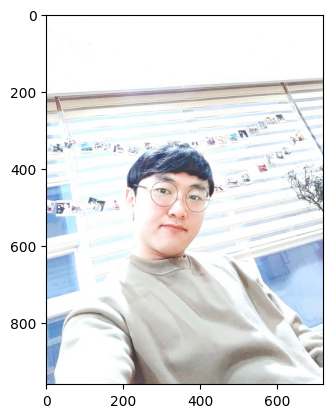

In [7]:
#이미지 차원 확인 
print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
# deeplabv3 모델 사용
model_file = 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

In [9]:
#model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
#urllib.request.urlretrieve(model_url, model_file)

In [10]:
#PixelLib 라이브러리에서 세그먼트 인스터스 만듬
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [11]:
#세그먼트 값과 출력값
segvalues, output = model.segmentAsPascalvoc(img_path)

In [12]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

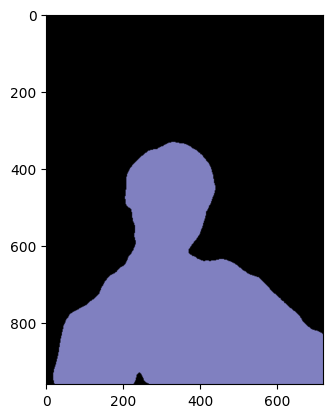

In [13]:
#세그먼트 이미지 확인
plt.imshow(output)
plt.show()

In [14]:
# 어떤 레이블로 구분하였는지 확인
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [15]:
#세그먼트 결과를 컬러맵으로 확인
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [16]:
#인간(16전째 레이블) 색깔 확인
colormap[15]

array([192, 128, 128])

In [17]:
# BGR 순서로 재배치
seg_color = (128,128,192)

(960, 720)


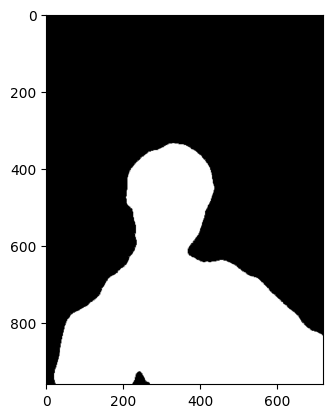

In [18]:
# 레이블과 배경 이미지 확인
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

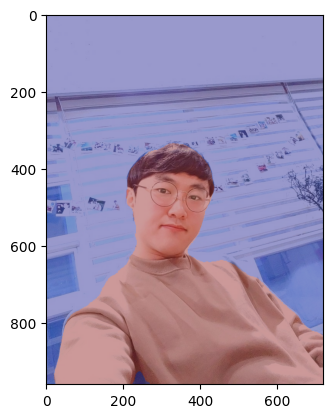

In [19]:
# 원본 이미지와 비교 확인

img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

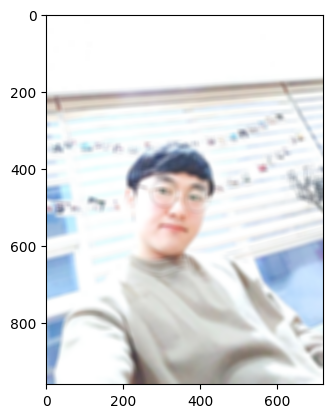

In [20]:
# 블러 처리
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

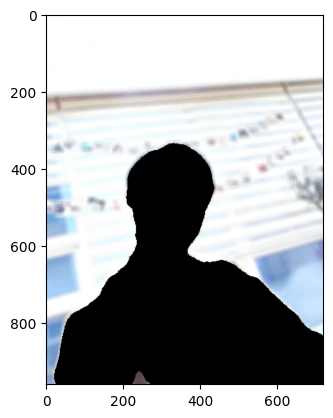

In [21]:
# 블러처리 된 배경 이미지만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

#### 어두분 사진에 비해 밝은 사진은 배경을 구분하기 어려움

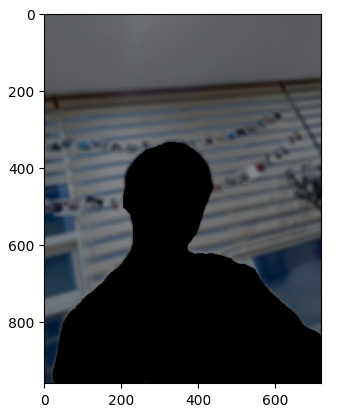
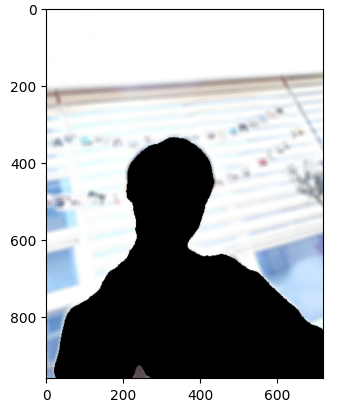

#### - 밝은 영역인 왼쪽 영역 팔과 목, 뒤통수 부분의 영역 경계에서 차이를 보임

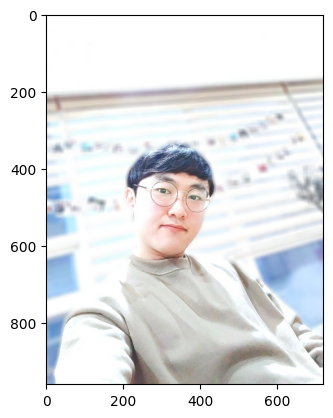

In [22]:
# 블러처리 된 이미지 위 원본 이미지 합성
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

#### 어찌보면 당연한 결과로 보이며, 너무 밝은 사진은 보정을 통해 어둡고 색상대비를 분명하게 만든 후, segment해야 할것으로 보임
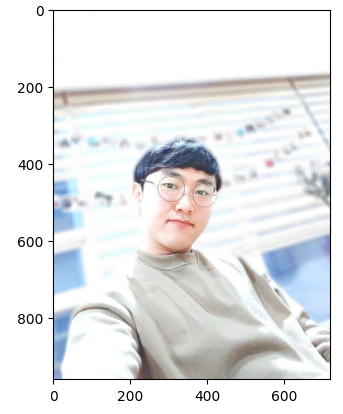
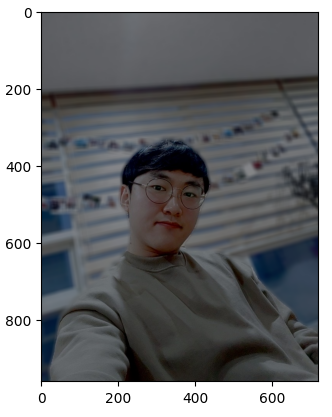